# REW Data Processing
This notebook used for processing measurement data which acquired by Room Equalization Wizard (REW) on headphone's response test 

In [1]:
# import all necessary package
import numpy as np 
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import os

# Processing Single Data
This section used for analyse single measurement data

In [2]:
# import data 
filename = './sample_data/L_1000/x1/L_x1_1000_11.txt'

# erase the description line
with open(filename, 'r') as f:
    lines = f.readlines()
with open(filename, 'w') as f:
    for line in lines:
        if not line.startswith("*"):
            f.write(line)

# load data as dataframe and add the header
data = pd.read_csv(filename, sep=" ", names=['Freq', 'SPL'])

for i in range(len(data)):
    data['Freq'][i] = data['Freq'][i].replace(',', '')
    data['Freq'][i] = np.round(float(data['Freq'][i]), decimals=1)

    data['SPL'][i] = np.round(data['SPL'][i], decimals=1)

# show the level on certain frequency
freq = 1000.4
SPL = data.loc[data['Freq'] == freq, 'SPL'].iloc[0]
print('The value of SPL on ' + str(freq) + ' Hz is equals to ' + str(SPL) + ' dB')

The value of SPL on 1000.4 Hz is equals to 82.1 dB


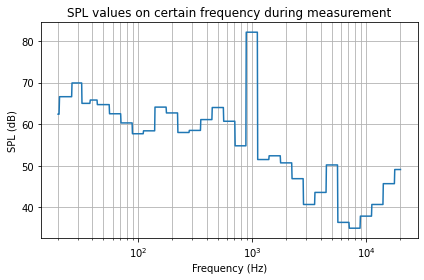

In [3]:
# visualize the data
fig, ax = plt.subplots(tight_layout=True)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('SPL (dB)')
ax.set_title('SPL values on certain frequency during measurement')

ln1 = ax.plot(data['Freq'], data['SPL'])
ax.grid(which='both')
ax.set_xscale('log')


# Processing Batch of Data
This section used for creating plot of resulted level on each scale on certain frequency

In [4]:
# define get SPL function
def get_spl(filename, frequency):
    # erase the description line on the loaded data
    with open(filename, 'r') as f:
        lines = f.readlines()
    with open(filename, 'w') as f:
        for line in lines:
            if not line.startswith("*"):
                f.write(line)

    # load data as dataframe and add the header
    data = pd.read_csv(filename, sep=" ", names=['Freq', 'SPL'])

    for i in range(len(data)):
        data['Freq'][i] = data['Freq'][i].replace(',', '')
        data['Freq'][i] = np.round(float(data['Freq'][i]), decimals=1)

        data['SPL'][i] = np.round(data['SPL'][i], decimals=1)

    # show the level on certain frequency
    return data.loc[data['Freq'] == frequency, 'SPL'].iloc[0]
    


In [9]:
# define data directory 
filedir = './sample_data/L_1000/'

# define frequency
freq = 1000.4

# create empty dataframe
index = ['x{}'.format(i) for i in np.arange(1,4,1)]
column = [str(i) for i in np.arange(1,12,1)]
df = pd.DataFrame(index=index, columns=column)

for r, d, f in os.walk(filedir):
    for file in f:
        filename = os.path.join(r,file) 
        iteration = filename.split('/')[3]
        
        scale = filename.split('/')[4]
        scale = scale.replace('.txt', '').split('_')[-1]

        spl = get_spl(filename, freq)

        df[str(scale)][iteration] = spl
        # print(str(iteration) + ' - ' + str(scale) + ':' + str(spl))

# visualize dataframe
df.head()


,1,2,3,4,5,6,7,8,9,10,11
x1,39.0,42.3,46.2,42.3,51.1,52.6,58.4,64.2,70.6,76.7,82.1
x2,39.0,42.3,46.2,42.3,51.1,52.6,58.4,64.2,70.6,76.7,82.1
x3,39.0,42.3,46.2,42.3,51.1,52.6,58.4,64.2,70.6,76.7,82.1
